In [94]:
# Imports

from glob import glob
import os
import librosa
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sklearn as sk
import seaborn as sn
from sklearn.decomposition import PCA

In [25]:
### STEP 2 ###

loc = './pr_lab1_2020-21_data/digits'

'''
parse_free_digits(loc)
'''

def data_parser(directory):
    files = glob(os.path.join(directory, "*.wav"))
    fnames = [f.split('/')[3].split('.')[0] for f in files]
    # extract ids from filename
    ids = [int(f[-2]+f[-1]) if f[-2].isdigit() else int(f[-1]) for f in fnames]
    # extract float arrays of signals
    waves = [librosa.load(fpath,sr=None)[0] for fpath in files]
    # extract digits from filenames
    digits = []
    for i in range(len(fnames)):
        if str(ids[i]) in fnames[i]:
            fnames[i] = fnames[i].replace(str(ids[i]),'')
    
    return waves, ids, fnames


In [26]:
waves, ids, fnames = data_parser(loc)

print(f"{fnames[0]}{ids[0]} is a {type(waves[0])} with shape {waves[0].shape}")

seven5 is a <class 'numpy.ndarray'> with shape (13711,)


In [27]:
### STEP 3 ###

waves, _, _ = data_parser(loc)

def extract_mfcc(waves, num_mfcc=13, window=25, step=10):
    '''
    returns list of np.arrays of shape (frames of signal x num_mfcc)
    '''
    w = window*16 ## length of window in samples
    s = step*16  ## length of step in samples
    mfccs = [
        librosa.feature.mfcc(y=wav, n_mfcc=num_mfcc, n_fft=w, hop_length=s).T ## by default returns (MFCC x Frames) shape
        for wav in tqdm(waves, desc='Extracting MFCC features...')
    ]
    deltas = [librosa.feature.delta(mfcc) for mfcc in mfccs]
    ddeltas = [librosa.feature.delta(d) for d in deltas]
    
    print(f'Feature extraction completed: {num_mfcc} MFCCs per frame.')
    return mfccs, deltas, ddeltas


def extract_mfsc(waves, num_mfsc=13, window=25, step=10):
    '''
    returns list of np.arrays of shape (frames of signal x num_mfsc)
    '''
    w = window*16 ## length of window in samples
    s = step*16  ## length of step in samples
    mfscs = [
        librosa.feature.melspectrogram(y=wav, n_mels=num_mfsc, n_fft=w, hop_length=s).T ## by default returns (MFSC x Frames) shape
        for wav in tqdm(waves, desc='Extracting MFSC features...')
    ]
    
    print(f'Feature extraction completed: {num_mfsc} MFSCs per frame.')
    return mfscs



In [28]:
mfccs, deltas, ddeltas = extract_mfcc(waves)

print(f"{fnames[0]}{ids[0]} has {mfccs[0].shape[0]} frames of {mfccs[0].shape[1]} MFCCs")

print(f"Derivatives have a shape of {deltas[0].shape}")

mfscs = extract_mfsc(waves)

print(f"{fnames[0]}{ids[0]} has {mfscs[0].shape[0]} frames of {mfscs[0].shape[1]} MFSCs")


Extracting MFCC features...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:01<00:00, 107.22it/s]


Feature extraction completed: 13 MFCCs per frame.
seven5 has 86 frames of 13 MFCCs
Derivatives have a shape of (86, 13)


Extracting MFSC features...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:00<00:00, 879.84it/s]

Feature extraction completed: 13 MFSCs per frame.
seven5 has 86 frames of 13 MFSCs


Extracting MFCC features...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:01<00:00, 114.37it/s]


Feature extraction completed: 13 MFCCs per frame.


Extracting MFSC features...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 133/133 [00:00<00:00, 896.80it/s]

Feature extraction completed: 13 MFSCs per frame.


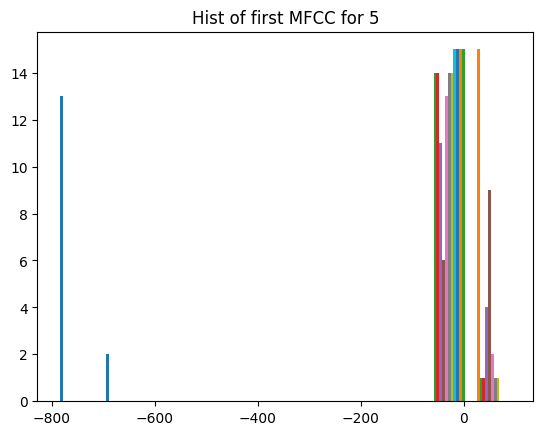

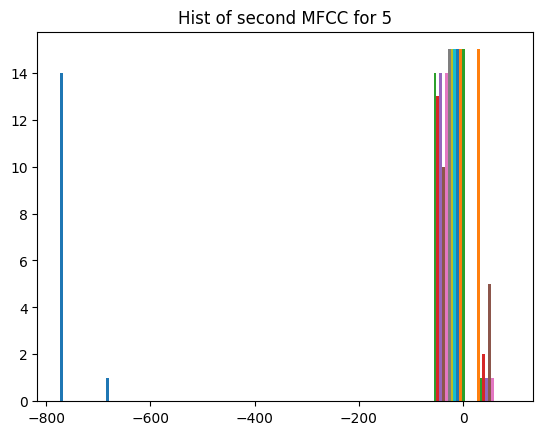

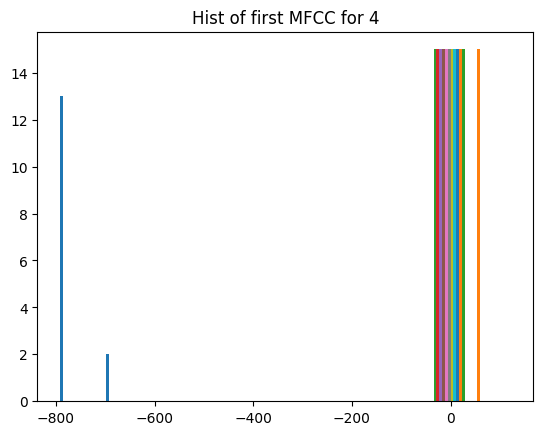

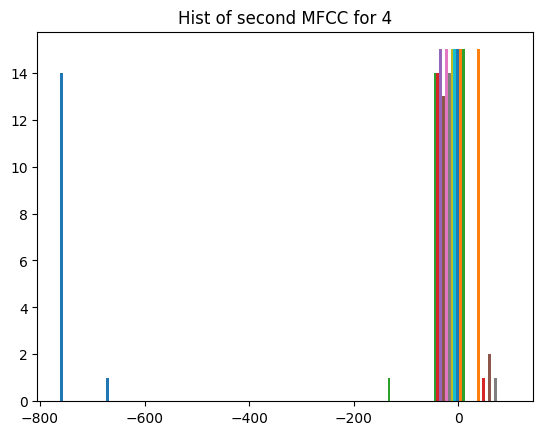

In [33]:
### STEP 4 ### 

loc = './pr_lab1_2020-21_data/digits'

n1 = 5 # Damianos
n2 = 4 # Aravanis

ston = {'zero':0, 'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'nine':9}

waves, ids, digits = data_parser(loc)
mfccs, deltas, ddeltas = extract_mfcc(waves)

digits = [ston[d] for d in digits]

mfscs = extract_mfsc(waves)

def find_indices(lista,item):
    indices = []
    for idx, value in enumerate(lista):
        if value == item:
            indices.append(idx)
    return indices

def plot_feats(kind,feats,digits,n1=5,n2=4):
    ## find indices of the wav files for n1 and n2
    n1_indices = find_indices(digits,n1)
    n2_indices = find_indices(digits,n2)
    
    n1_feat0 = []
    n1_feat1 = []
    for i in n1_indices:
        n1_feat0.append(feats[i][:][0])
        n1_feat1.append(feats[i][:][1])
        
    n2_feat0 = []
    n2_feat1 = []
    for i in n2_indices:
        n2_feat0.append(feats[i][:][0])
        n2_feat1.append(feats[i][:][1])
        
    plt.hist(np.array(n1_feat0))
    plt.title(f"Hist of first {kind} for {n1}")
    plt.show()
    plt.hist(np.array(n1_feat1))
    plt.title(f"Hist of second {kind} for {n1}")
    plt.show()
    plt.hist(np.array(n2_feat0))
    plt.title(f"Hist of first {kind} for {n2}")
    plt.show()
    plt.hist(np.array(n2_feat1))
    plt.title(f"Hist of second {kind} for {n2}")
    plt.show()
    
    
plot_feats('MFCC',mfccs,digits,n1,n2)


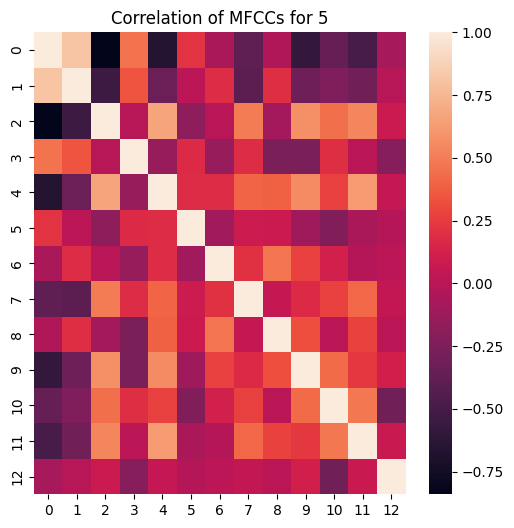

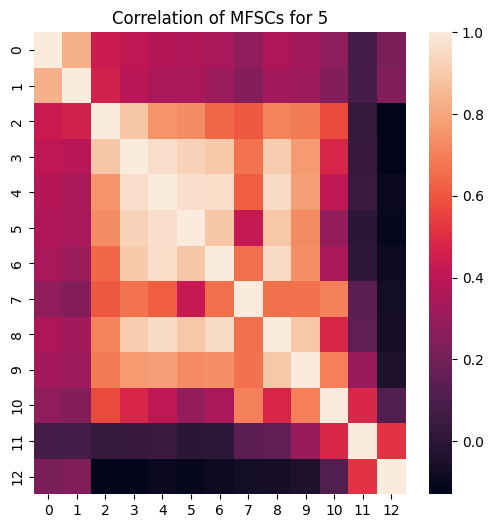

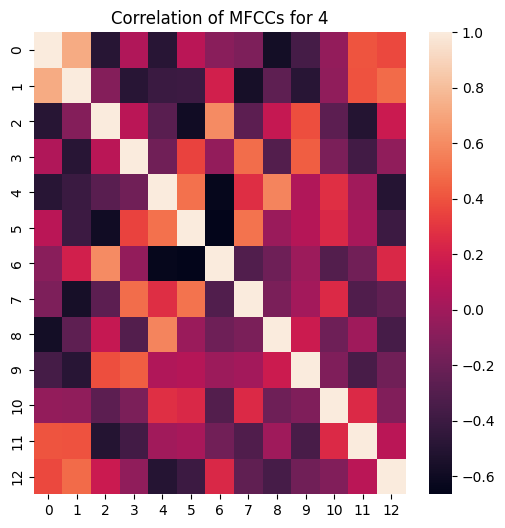

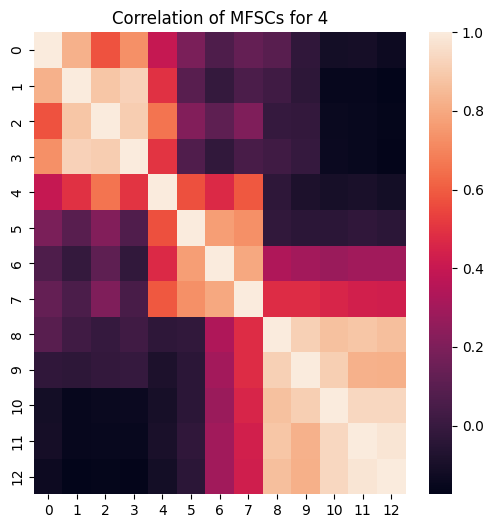

In [42]:
# Find two transcriptions for n1

i = 0
two_n1 = []
for idx, value in enumerate(digits):
    if value == n1:
        two_n1.append(idx)
        i +=1
        if i == 2:
            break

corr_matrix = np.corrcoef(np.concatenate((mfccs[two_n1[0]],mfccs[two_n1[1]]), axis=0).T)
fig, ax = plt.subplots(figsize=(6,6))
sn.heatmap(corr_matrix, ax=ax)
plt.title(f"Correlation of MFCCs for {n1}")
plt.show()

corr_matrix = np.corrcoef(np.concatenate((mfscs[two_n1[0]],mfscs[two_n1[1]]), axis=0).T)
fig, ax = plt.subplots(figsize=(6,6))
sn.heatmap(corr_matrix, ax=ax)
plt.title(f"Correlation of MFSCs for {n1}")
plt.show()
        
# Find two transcriptions for n2

i = 0
two_n2 = []
for idx, value in enumerate(digits):
    if value == n2:
        two_n2.append(idx)
        i +=1
        if i == 2:
            break

corr_matrix = np.corrcoef(np.concatenate((mfccs[two_n2[0]],mfccs[two_n2[1]]), axis=0).T)
fig, ax = plt.subplots(figsize=(6,6))
sn.heatmap(corr_matrix, ax=ax)
plt.title(f"Correlation of MFCCs for {n2}")
plt.show()  

corr_matrix = np.corrcoef(np.concatenate((mfscs[two_n2[0]],mfscs[two_n2[1]]), axis=0).T)
fig, ax = plt.subplots(figsize=(6,6))
sn.heatmap(corr_matrix, ax=ax)
plt.title(f"Correlation of MFSCs for {n2}")
plt.show()


In [47]:
### STEP 5 ###

features = [np.concatenate((mfccs[i],deltas[i],ddeltas[i]), axis=1) for i in range(len(mfccs))]
features[0].shape

(86, 39)

(78,)


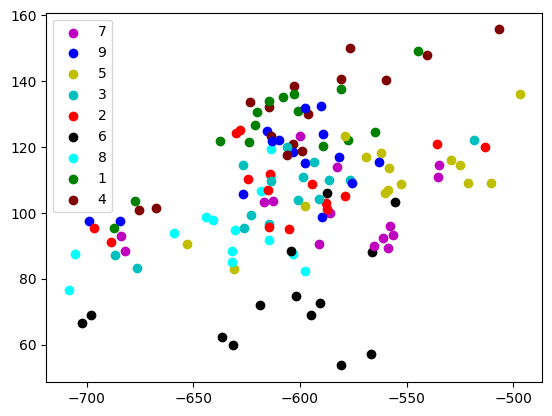

In [84]:
def legend_without_duplicate_labels(figure):
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    figure.legend(by_label.values(), by_label.keys(), loc='upper left')


feature_vectors = [np.concatenate((np.mean(features[i], axis=0),np.std(features[i], axis=0))) 
                  for i in range(len(features))]

print(feature_vectors[0].shape)

ntoc = {1:'g', 2:'r', 3:'c', 4:'maroon', 5:'y',
        6:'k', 7:'m', 8:'aqua', 9:'b'}

for idx, vec in enumerate(feature_vectors):
    x = vec[0]
    y = vec[1]
    plt.scatter(x,y,color=ntoc[digits[idx]],label=digits[idx])
    
legend_without_duplicate_labels(plt)
plt.show()
        

(133, 78)
The variance of the two components : [0.61310875 0.10540762]


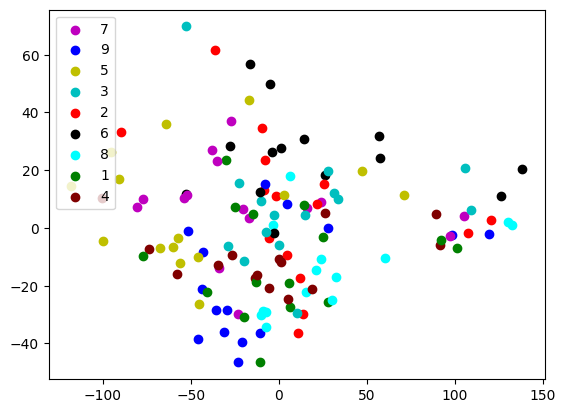

(133, 3)
The variance of the three components : [0.61310875 0.10540762 0.10259704]


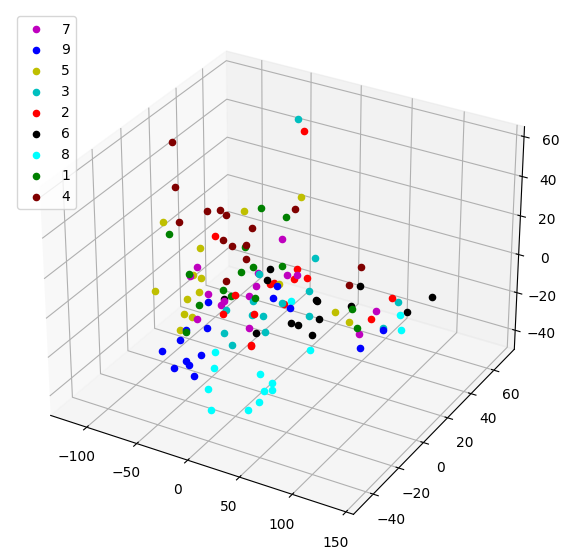

In [97]:
### STEP 6 ###

data = np.asarray(feature_vectors)
print(data.shape)

pca_2 = PCA(n_components=2)
pca_3 = PCA(n_components=3)

# Two dim PCA

two_dim = pca_2.fit_transform(data)

print(f"The variance of the two components : {pca_2.explained_variance_ratio_}")

for idx, vec in enumerate(two_dim):
    x = vec[0]
    y = vec[1]
    plt.scatter(x,y,color=ntoc[digits[idx]],label=digits[idx])
    
legend_without_duplicate_labels(plt)
plt.show()

# Three dim PCA

three_dim = pca_3.fit_transform(data)
print(three_dim.shape)

print(f"The variance of the three components : {pca_3.explained_variance_ratio_}")

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
    
for idx, vec in enumerate(three_dim):
    x = vec[0]
    y = vec[1]
    z = vec[2]
 
    ax.scatter3D(x, y, z, color=ntoc[digits[idx]],label=digits[idx])

    
legend_without_duplicate_labels(plt)
plt.show()
        